<Body>   
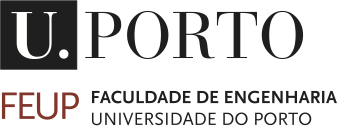   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #03: Linearization and stability**


#1- A nonlinear system





## **Activity 1**

Consider the nonlinear system
\begin{align*}
\dot x_1 &= x_1(\mu - x_1^2 - x_2^2) - x_2 \\
\dot x_2 &= x_2(\mu - x_1^2 -x_2^2) + x_1
\end{align*}

where $\mu$ is a parameter.


**1.1**
Plot the **time-evolution** of the state and the **phase space** for different initial conditions with $\mu < 0$.

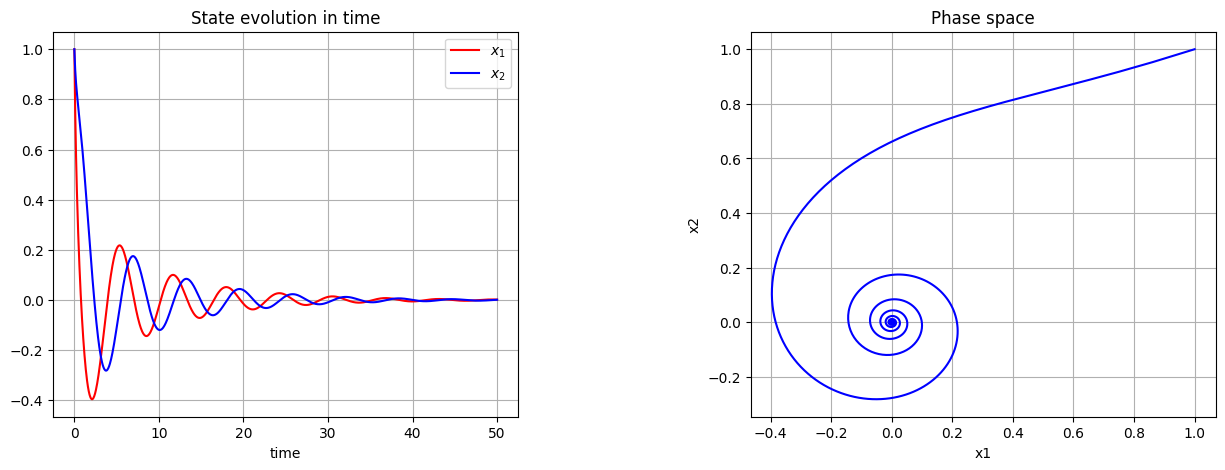

In [5]:
# To complete

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
mu = -0.1

# x1 = x[0]
# x2 = x[1]

# vector field
def Sys_f(x, t=0):
  return np.array([ x[0]*(mu - x[0]**2 - x[1]**2) - x[1],
                    x[1]*(mu - x[0]**2 - x[1]**2) + x[0]
                   ])

# generate 1000 linearly spaced points for t
t_end=50
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, 1.0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
# infodict['message']                      # integration successful

x1,x2 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, x1, 'r-', label='$x_1$')
ax1.plot(t, x2, 'b-', label='$x_2$')
ax1.set_title("State evolution in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1, x2, color="blue")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()
plt.show()


**1.2**
Do the same but now with $\mu > 0$, e.g., $\mu = 0.1$

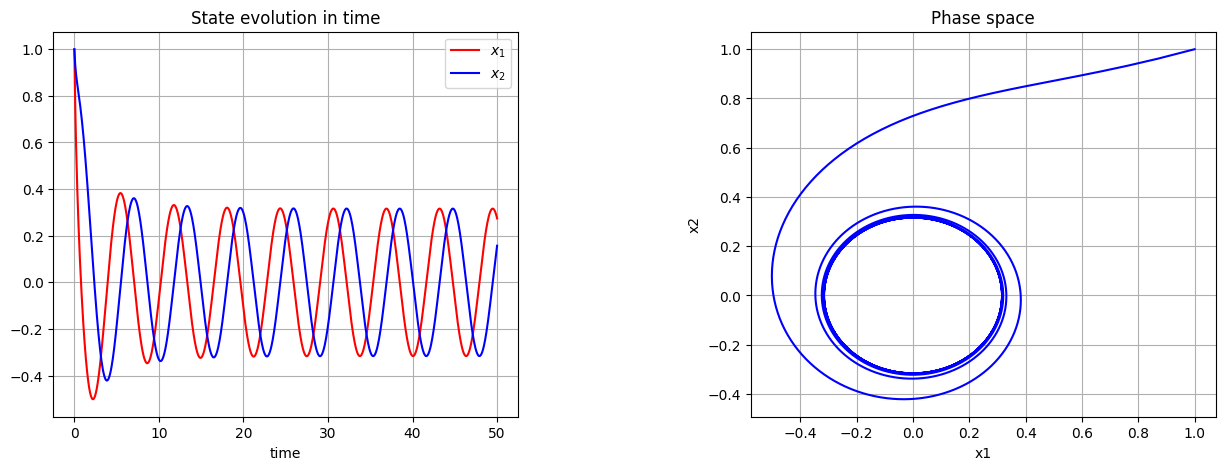

In [3]:
# To complete

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
mu = 0.1

# x1 = x[0]
# x2 = x[1]

# vector field
def Sys_f(x, t=0):
  return np.array([ x[0]*(mu - x[0]**2 - x[1]**2) - x[1],
                    x[1]*(mu - x[0]**2 - x[1]**2) + x[0]
                   ])

# generate 1000 linearly spaced points for t
t_end=50
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, 1.0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
# infodict['message']                      # integration successful

x1,x2 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, x1, 'r-', label='$x_1$')
ax1.plot(t, x2, 'b-', label='$x_2$')
ax1.set_title("State evolution in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1, x2, color="blue")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()
plt.show()

**1.3**
Show that the origin $x=0$ is an equilibrium point and linearize the system around it. For the linearized system, sketch the phase portrait, and determine the type of equilibrium point.

What can you conclude about the (local) stability of the equilibrium point $x=0$ of the nonlinear system?

In [25]:
# To complete
import numpy as np

# Linearized system \dot x = A x
mu = -0.1
#mu = 0.1

if np.array_equal(Sys_f([0,0]), [0,0]):
    print('[0,0] is an equilibrium point')

print('==================================')

A = np.array([
            [mu, -1],\
            [1, mu] ] )
print ('A matrix\n', A)

#Let's check the eigenvalues of A
eig_open_loop, eig_vect = np.linalg.eig( A )
print ('Eigenvalues of A \n', eig_open_loop)


[0,0] is an equilibrium point
A matrix
 [[-0.1 -1. ]
 [ 1.  -0.1]]
Eigenvalues of A 
 [-0.1+1.j -0.1-1.j]


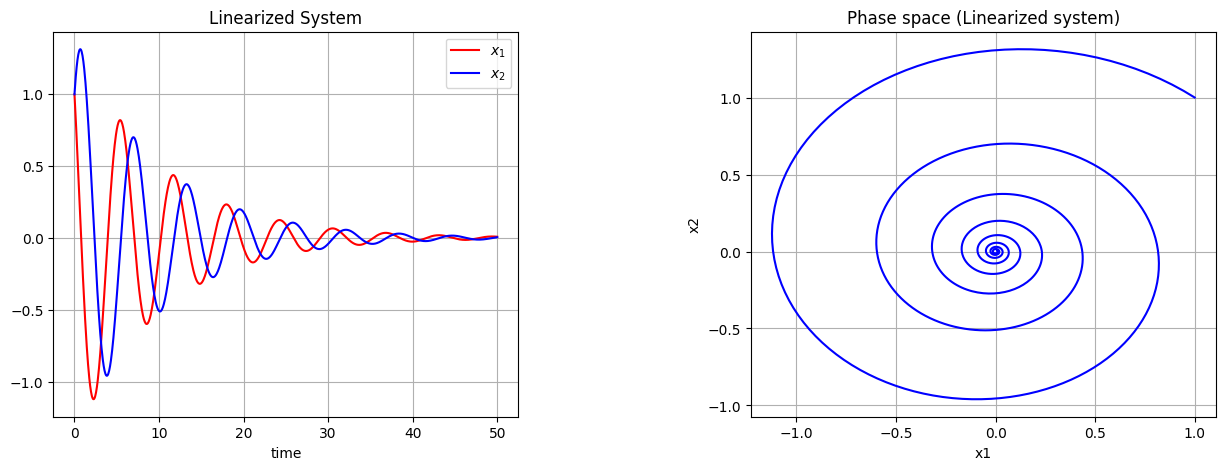

In [28]:
# To complete
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
mu = -0.1
#mu = 0.1

# vector field
def Sys_lin_f(x, t=0):
  A = np.array([
            [mu, -1],
            [1, mu] ] )
  return A@x

# generate 1000 linearly spaced points for t
t_end=50
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, 1.0])

x, infodict = integrate.odeint(Sys_lin_f, x0, t, full_output=True)

x1,x2 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, x1, 'r-', label='$x_1$')
ax1.plot(t, x2, 'b-', label='$x_2$')
ax1.set_title("Linearized System")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1, x2, color="blue")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space (Linearized system)")
ax2.grid()
plt.show()


**1.4**
Using polar coordinates, it is possible to conclude that the system can be described as
\begin{align*}
\dot r &= \mu r - r^3  \\
\dot \theta &= 1
\end{align*}
where $r = \sqrt{x_1^2+x_2^2}$ and $\theta = \tan^{-1}\big(\frac{\theta_2}{\theta_1}\big)$. Working only with the first equation for the radius, linearize it around $r=0$, apply the Lyapunov's indirect method and analyze the stability of the nonlinear system.

In [51]:
import autograd.numpy as np
from autograd import jacobian

# parameters
mu = 0.1

# vector field
def Sys_f(r):
  r_norm = np.sqrt(r[0]**2 + r[1]**2 + 1e-8)  # add small constant to avoid division by zero
  theta = np.arctan2(r[1], r[0])
  return np.array([mu*r_norm - r_norm**3, 1])

# Compute the Jacobian
jacobian_Sys_f = jacobian(Sys_f)

# Evaluate the Jacobian at the point [0,0]
A = jacobian_Sys_f(np.array([0.0, 0.0]))

print(A)

[[0. 0.]
 [0. 0.]]


#2- The Cart–pendulum system


<Body>   
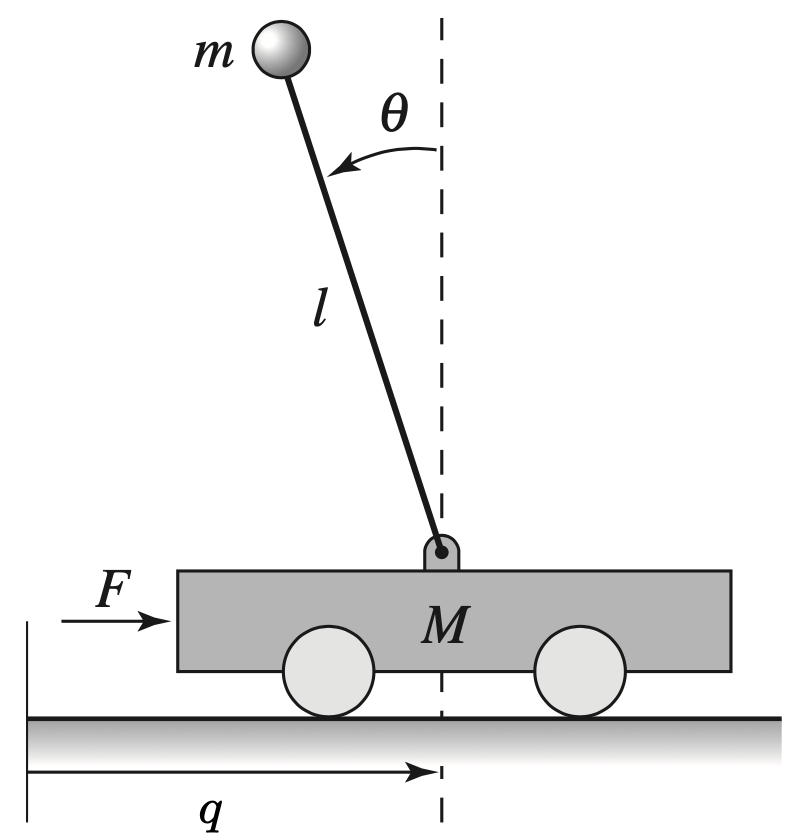

*Source:* Åström, Karl Johan, and Richard M. Murray. Feedback systems: an introduction for scientists and engineers. 2nd Edition, Princeton university press, 2019

The figure above shows a simplified diagram for a balance system consisting of an inverted pendulum on a cart.
Let $q$ and $\dot q$ be the position and velocity of the base of the system, and $\theta$ and $\dot\theta$ the angle and angular rate of the structure above the base. Let $F$ represent the force applied at the base of the system, assumed to be in the horizontal direction (aligned with $q$).
Using Newtonian mechanics, it follows that the equations of motion of the cart and pendulum satisfy
\begin{equation}
(M+m)\ddot q -(ml\cos\theta) \ddot\theta + c\dot q + m l \sin\theta\,\dot\theta^2 = F \\
-ml\cos\theta\, \ddot q + (J+m l^2) \ddot\theta + \gamma\dot\theta - mgl\sin\theta = 0
\end{equation}
where $M$ is the mass of the base, $m$ and $J$ are the mass and moment of inertia of the system to be balanced, $l$ is the distance from the base to the center of mass of the balanced body, $c$ and $\gamma$ are coefficients of viscous friction, and $g$ is the acceleration due to gravity.



**Goal:** Design a linear feedback law for the force $F$ such that the cart-pendulum system stabilizes the inverted-pendulum on a cart system at the upright position.

## **Activity 2**


**2.1.**
Defining the state $x = (q, \theta, \dot q, \dot \theta)^⊤$, input $u=F$, output $y=(q, \theta)^⊤$, and the total mass as $M_t=M+m$ and the total inertia as $J_t=J+ml^2$, and $\mu = M_t J_t -m^2 l^2$, we obtain the system in state-space form:

\begin{align*}
\begin{bmatrix}
  \dot x_1 \\
  \dot x_2 \\
  \dot x_3 \\
  \dot x_4
\end{bmatrix}
&=
\begin{bmatrix}
x_3 \\
x_4 \\
\frac{-ml\sin(x_2) x_4^2 +mg(ml^2/J_t)\sin(x_2)\cos(x_2) - c x_3 - (\gamma/J_t)m l \cos(x_2) x_4 + u}{M_t-m(ml^2/J_t)\cos^2(x_2)}\\
\frac{-ml\sin(x_2)\cos(x_2) x_4^2 +M_tgl\sin(x_2) - cl\cos(x_2)x_3 - \gamma(M_t/m)x_4 + l\cos(x_2)u}{J_t(M_t/m)-m(l\cos(x_2))^2}
\end{bmatrix} \\
y &=
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\end{align*}




Show that the origin $x = 0$ with $u=0$ is an equilibrium point and linearize the system around that point.

**2.3.**
Analyze the stability of the origin $x = 0$ with $u=0$ of the linear and nonlinear system.

In [ ]:
# To complete

import numpy as np
#import control

M = 5.0
m = 1.0
l = 1.0
J = 0.2
c= 0.1
gamma=0.1
g = 9.8

Mt = M+m
Jt = J+m*l**2
mu = Mt*Jt -m**2
A = np.array([\
            [#],\
            [#],\
            [#],\
            [#] ] )

B = np.array([\
            [#],\
            [#],\
            [#],\
            [#] ] )


print ('A\n', A)
print ('B\n', B)

eig_open_loop, eig_vect = np.linalg.eig( A )
print ('Eigenvalues of A \n', eig_open_loop)



**2.4.**
(Extra) Using pole placement, design a linear feedback control law and verify the results for small initial conditions around the equilibrium point of the nonlinear system (compute the time evolution).

In [ ]:
pip install control

In [ ]:
import control

# Controllability
print ('---Controllability')
print ('rank of ctrb(A,b)' , np.linalg.matrix_rank( control.ctrb( A, B ) ))
print ('Eigenvalues of A ', np.linalg.eig( A )[0])


# Pole Placement
K = control.place( A, B, [-1, -2, -1.8, -2.5] )
print ('---Pole Placement\nK=\n', K)

# Verification of Eigen values of A-BK
print ('\n---Verification of Eigenvalues of A-BK\n')
Acl = A-B@K
#print(Acl)
eig_Acl, eig_vect = np.linalg.eig( Acl )
print ('Eigenvalues of A-BK:', eig_Acl)

In [ ]:
# To complete

import numpy as np
import matplotlib.pyplot as plt

# linearized system
def Sys_lin_f(x, u):
    """
    x: state of the system
    u: input to the system
    """
    A = np.array([\
            [#],\
            [#],\
            [#],\
            [#] ] )


    B = np.array([\
            [#],\
            [#],\
            [#],\
            [#] ] )

    return A@x + B@[u]

def rk_step_f(f, x, u, h):
    """
    f: dynamical system function
    x: current state of the system
    u: current input to the system
    h: sampling step
    """
    k1 = h*f(x, u)
    k2 = h*f(x + 0.5*k1, u)
    k3 = h*f(x + 0.5*k2, u)
    k4 = h*f(x + k3, u)
    x_next = x + (k1 + 2*k2 + 2*k3 + k4)/6
    return x_next

#Sample-time
dt = 0.01
t_end = 20

# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples
x_signal = np.zeros_like([t_signal,t_signal,t_signal,t_signal])
u_signal = np.zeros_like(t_signal)

#Initial conditions of our system
x_signal[:,0] = [0.5, 0.5, 0, 0]

#print(x_signal)

# Here we are only testing the closed-loop system using the linearized systme
for i in range(0,t_signal.shape[0]-1):
  u_signal[i] = -K@x_signal[:,i]
  x_signal[:,i+1] = rk_step_f(Sys_lin_f,x_signal[:,i],u_signal[i],dt)

# As homework, do it also for the nonlinear system!

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t_signal, x_signal[0], 'b-', label='$x_1$')
ax1.plot(t_signal, x_signal[1], 'r-', label='$x_2$')
ax1.set_title("State evolution")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, x_signal[2], 'b-', label='$x_3$')
ax2.plot(t_signal, x_signal[3], 'r-', label='$x_4$')
ax2.set_title("State evolution")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best');



---



---

